In [2]:
# 1. Các thư viện cần thiết
!pip3 install -U git+https://github.com/PYFTS/pyFTS
import pandas as pd
import numpy as np
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.models import chen
from pyFTS.common import FLR
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Fix the import in the pyFTS library if necessary
# In the file '/usr/local/lib/python3.10/dist-packages/pyFTS/common/transformations/trend.py', change:
# from pandas import datetime
# to:
# from pandas import Timestamp

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-nkhp1d6s
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-nkhp1d6s
  Resolved https://github.com/PYFTS/pyFTS to commit 4e0ee7cdd9fc9a8ac9170c0c3496536ef0378cb7
  Preparing metadata (setup.py) ... done


# **Chia train test theo tỉ lệ 8:2**

In [3]:
# 2. Đọc file csv và lấy  giá Close
df = pd.read_csv('BTC.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close'].values

In [4]:
# 3. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

/usr/local/lib/python3.10/dist-packages/pyFTS/partitioners/partitioner.py:278: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


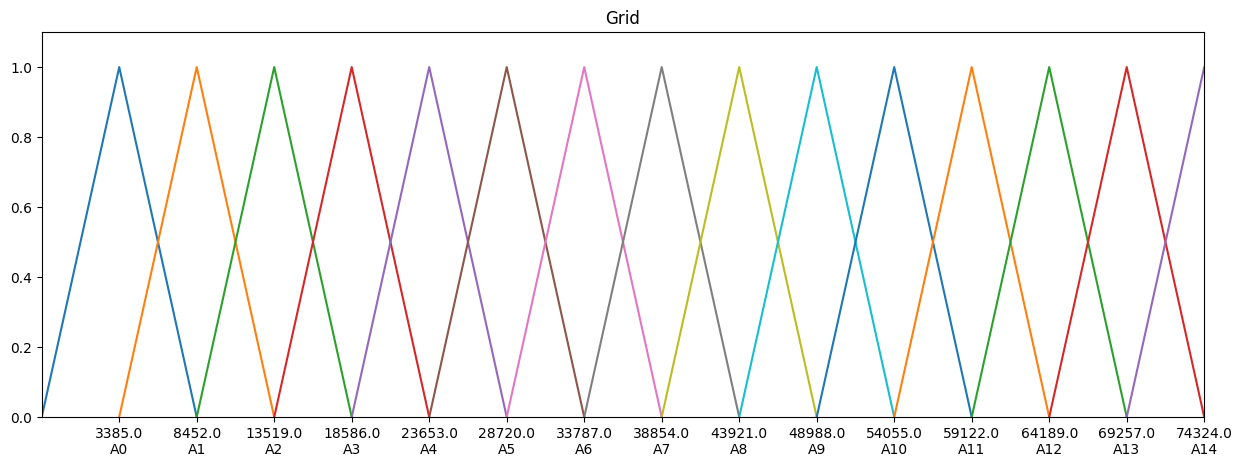

In [5]:
# 4. Xây dựng phân vùng mờ (Grid Partitioner)
partitioner = Grid.GridPartitioner(data=train_data, npart=15)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
partitioner.plot(ax)

In [6]:
# 5. Fuzzyfy dữ liệu huấn luyện (Chuyển đổi dữ liệu huấn luyện thành các giá trị mờ)
fuzzyfied = partitioner.fuzzyfy(train_data)

In [7]:
# 6. Tạo các mối quan hệ logic giữa các  mờ (FLR)
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)
print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A0 -> A2', 'A1 -> A2', 'A2 -> A1', 'A2 -> A2', 'A2 -> A0', 'A1 -> A3', 'A2 -> A3', 'A3 -> A1', 'A3 -> A2', 'A3 -> A3', 'A2 -> A4', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A2', 'A3 -> A5', 'A4 -> A5', 'A5 -> A3', 'A5 -> A4', 'A5 -> A5', 'A4 -> A6', 'A5 -> A6', 'A6 -> A5', 'A6 -> A6', 'A5 -> A7', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A6 -> A8', 'A7 -> A8', 'A8 -> A7', 'A8 -> A8', 'A8 -> A6', 'A7 -> A5', 'A7 -> A9', 'A8 -> A9', 'A9 -> A8', 'A9 -> A9', 'A8 -> A10', 'A9 -> A10', 'A10 -> A9', 'A10 -> A10', 'A9 -> A11', 'A10 -> A11', 'A11 -> A10', 'A11 -> A11', 'A10 -> A8', 'A11 -> A8', 'A11 -> A9', 'A10 -> A12', 'A11 -> A12', 'A12 -> A11', 'A12 -> A12', 'A12 -> A10', 'A9 -> A7', 'A11 -> A13', 'A12 -> A13', 'A13 -> A12', 'A13 -> A13', 'A13 -> A11', 'A6 -> A4']


In [8]:
# 7. Xây dựng mô hình FTS
model = chen.ConventionalFTS(partitioner=partitioner)
model.fit(train_data)
print(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A9
A11 -> A10,A11,A12,A9
A12 -> A11,A12,A13
A13 -> A12,A13



In [9]:
# 8. Dự đoán dữ liệu test
train_predict = model.predict(train_data)
y_pred_test = model.predict(test_data)

In [10]:
# 10. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, test_data)
test_mape = mean_absolute_percentage_error(y_pred_test, test_data)
test_rmse = np.sqrt(mean_squared_error(y_pred_test, test_data))
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1536.6877640445534
Testing RMSE: 1802.540660396224
Testing MAPE: 0.042109828688949816


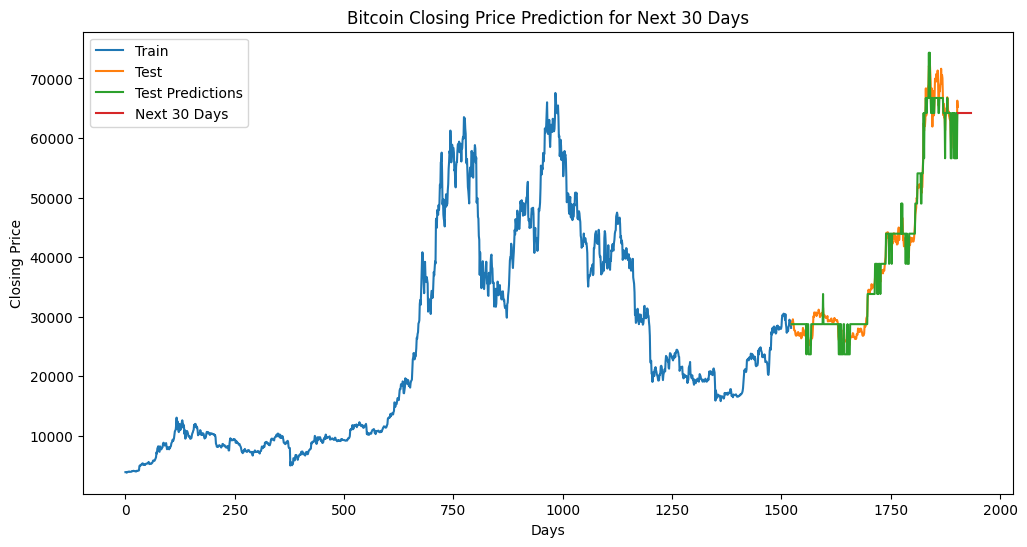

Predicted closing prices for the next 30 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963]


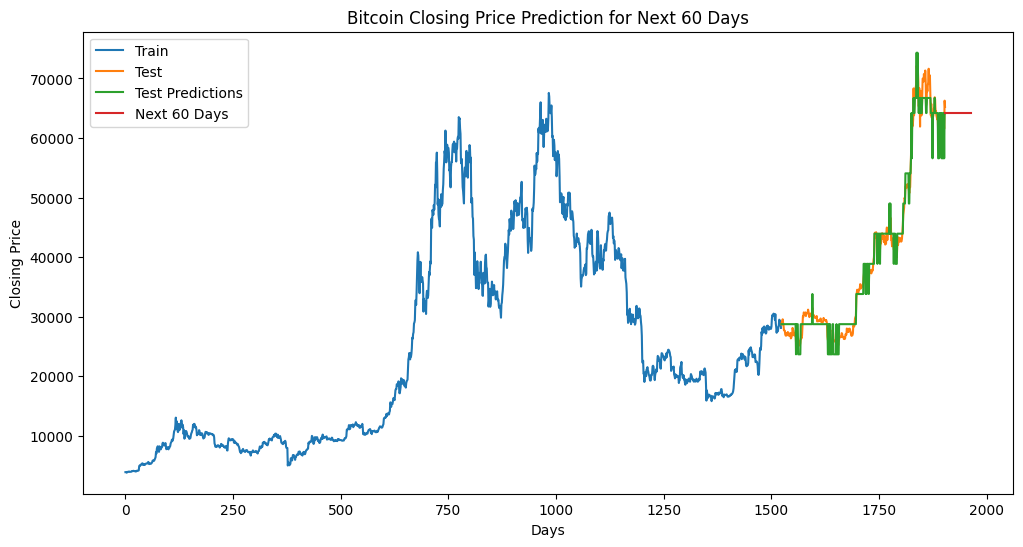

Predicted closing prices for the next 60 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963]


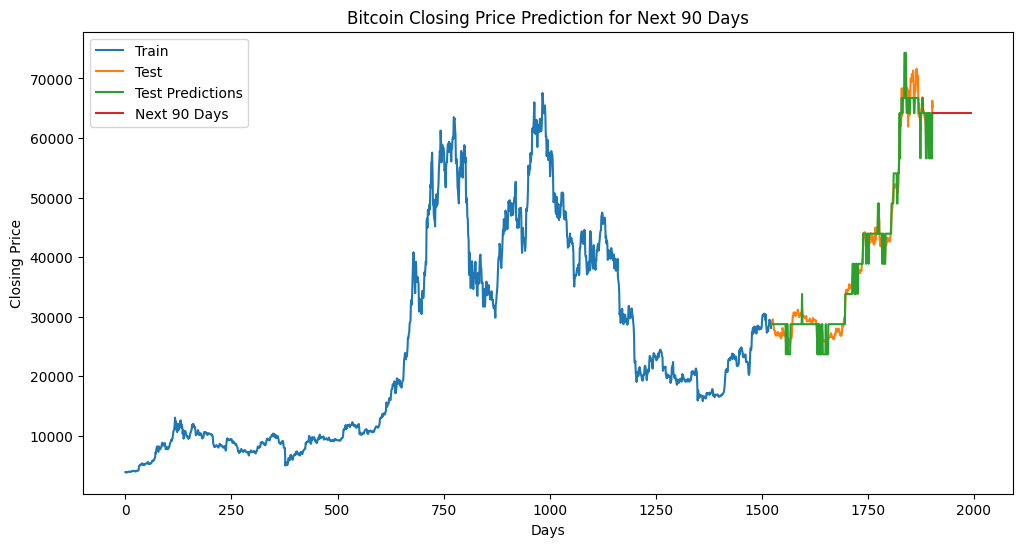

Predicted closing prices for the next 90 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 6

In [11]:
# 10. Dự đoán 30, 60, 90 ngày tiếp theo
time_step = 100
def predict_future(model, data, days):
    temp_input = list(data)
    lst_output = []

    for _ in range(days):
        x_input = temp_input[-1]  # Lấy giá trị cuối cùng để dự đoán tiếp
        yhat = model.predict([x_input])[0]  # Dự đoán giá trị tiếp theo
        temp_input.append(yhat)
        lst_output.append(yhat)

    return np.array(lst_output)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, days)


    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), train_data, label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(range(len(train_data), len(train_data) + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 7:3**

In [12]:
# 2. Đọc file csv và lấy  giá Close
df = pd.read_csv('BTC.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close'].values

In [13]:
# 3. Chia train, test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

/usr/local/lib/python3.10/dist-packages/pyFTS/partitioners/partitioner.py:278: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


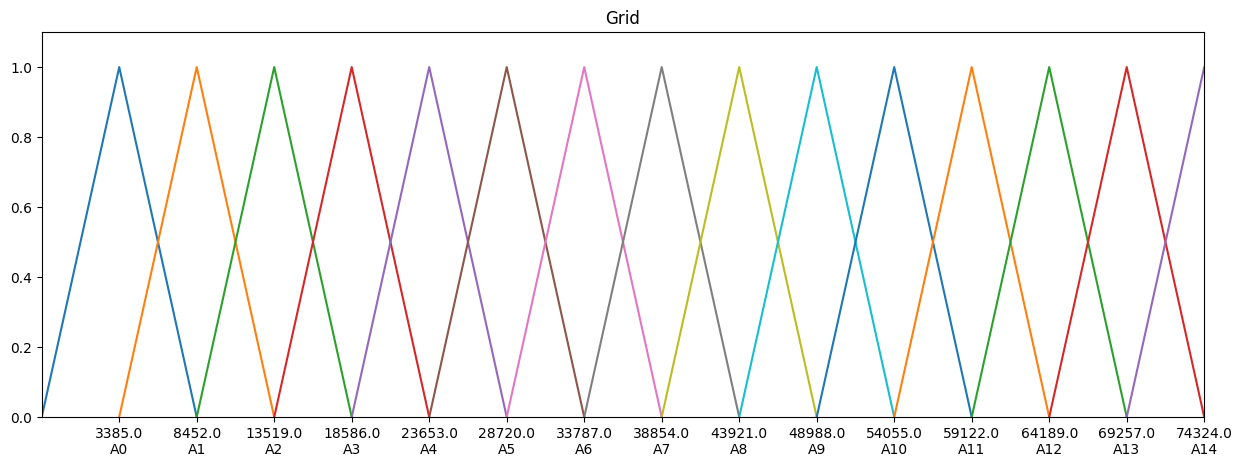

In [14]:
# 4. Xây dựng phân vùng mờ (Grid Partitioner)
partitioner = Grid.GridPartitioner(data=train_data, npart=15)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
partitioner.plot(ax)

In [15]:
# 5. Fuzzyfy dữ liệu huấn luyện (Chuyển đổi dữ liệu huấn luyện thành các giá trị mờ)
fuzzyfied = partitioner.fuzzyfy(train_data)

In [16]:
# 6. Tạo các mối quan hệ logic giữa các  mờ (FLR)
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)
print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A0 -> A2', 'A1 -> A2', 'A2 -> A1', 'A2 -> A2', 'A2 -> A0', 'A1 -> A3', 'A2 -> A3', 'A3 -> A1', 'A3 -> A2', 'A3 -> A3', 'A2 -> A4', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A2', 'A3 -> A5', 'A4 -> A5', 'A5 -> A3', 'A5 -> A4', 'A5 -> A5', 'A4 -> A6', 'A5 -> A6', 'A6 -> A5', 'A6 -> A6', 'A5 -> A7', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A6 -> A8', 'A7 -> A8', 'A8 -> A7', 'A8 -> A8', 'A8 -> A6', 'A7 -> A5', 'A7 -> A9', 'A8 -> A9', 'A9 -> A8', 'A9 -> A9', 'A8 -> A10', 'A9 -> A10', 'A10 -> A9', 'A10 -> A10', 'A9 -> A11', 'A10 -> A11', 'A11 -> A10', 'A11 -> A11', 'A10 -> A8', 'A11 -> A8', 'A11 -> A9', 'A10 -> A12', 'A11 -> A12', 'A12 -> A11', 'A12 -> A12', 'A12 -> A10', 'A9 -> A7', 'A11 -> A13', 'A12 -> A13', 'A13 -> A12', 'A13 -> A13', 'A13 -> A11', 'A6 -> A4']


In [17]:
# 7. Xây dựng mô hình FTS
model = chen.ConventionalFTS(partitioner=partitioner)
model.fit(train_data)
print(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A9
A11 -> A10,A11,A12,A9
A12 -> A11,A12,A13
A13 -> A12,A13



In [18]:
# 8. Dự đoán dữ liệu test
train_predict = model.predict(train_data)
y_pred_test = model.predict(test_data)

In [19]:
# 9. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, test_data)
test_mape = mean_absolute_percentage_error(y_pred_test, test_data)
test_rmse = np.sqrt(mean_squared_error(y_pred_test, test_data))
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1457.7394350142922
Testing RMSE: 1695.989915164153
Testing MAPE: 0.04909164294247104


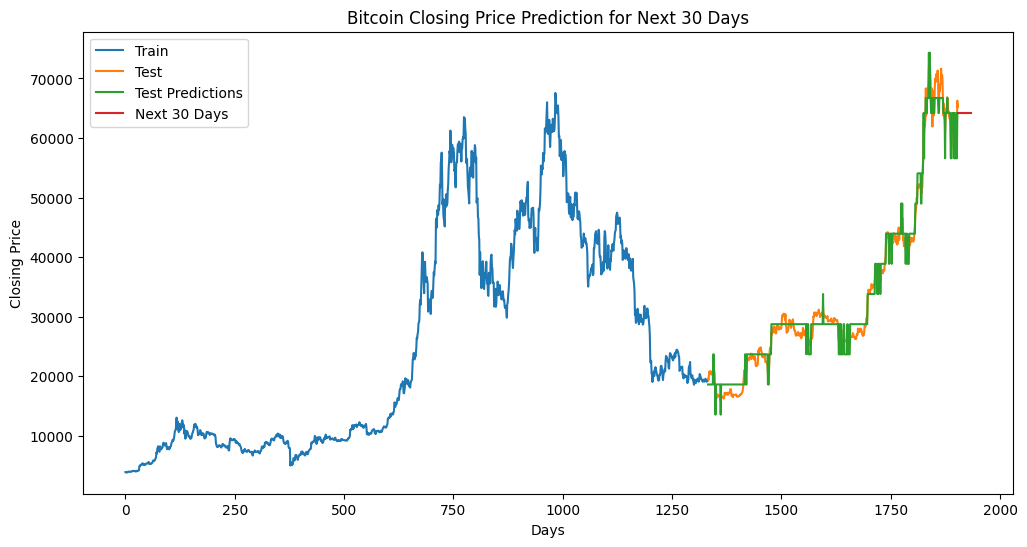

Predicted closing prices for the next 30 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963]


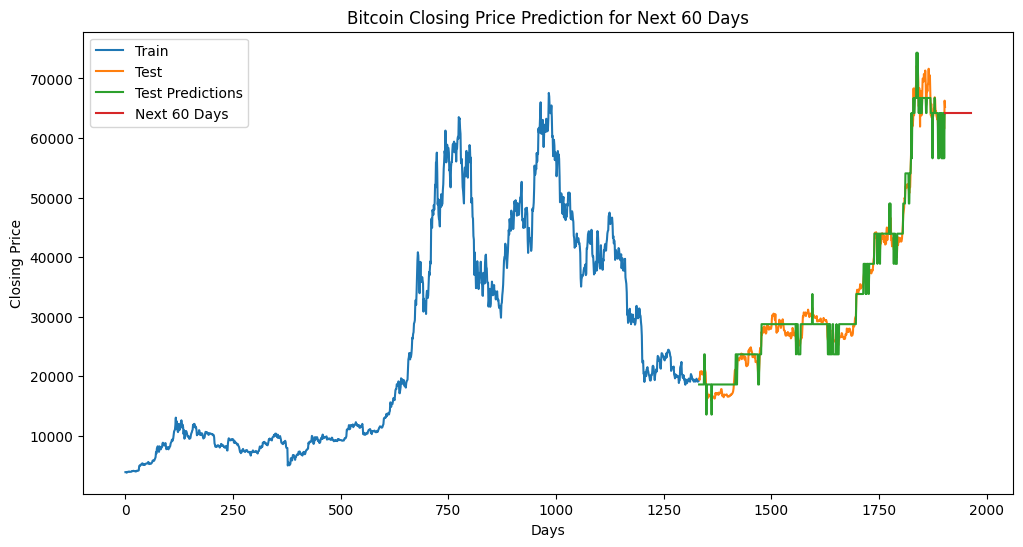

Predicted closing prices for the next 60 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963]


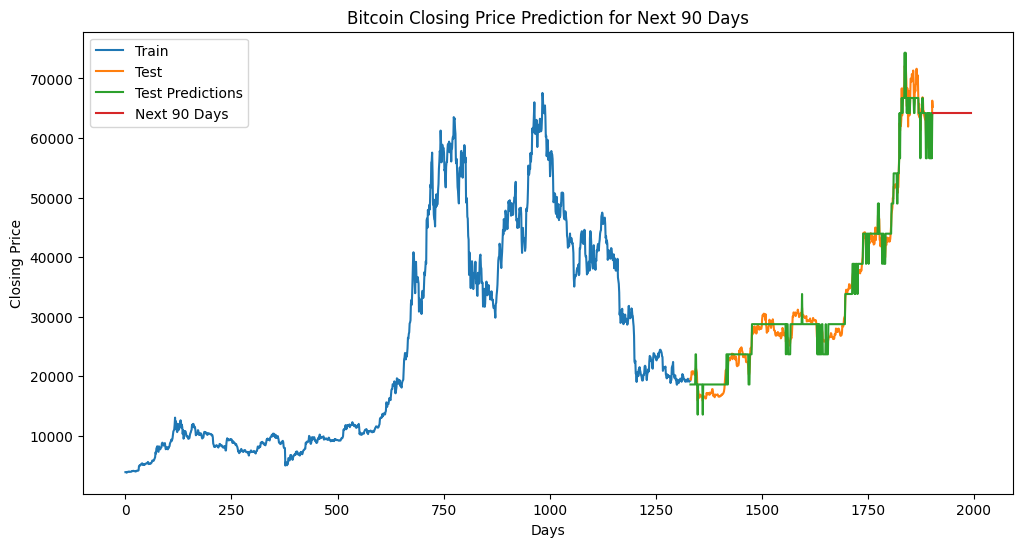

Predicted closing prices for the next 90 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 6

In [21]:
# 10. Dự đoán 30, 60, 90 ngày tiếp theo
time_step = 100
def predict_future(model, data, days):
    temp_input = list(data)
    lst_output = []

    for _ in range(days):
        x_input = temp_input[-1]  # Lấy giá trị cuối cùng để dự đoán tiếp
        yhat = model.predict([x_input])[0]  # Dự đoán giá trị tiếp theo
        temp_input.append(yhat)
        lst_output.append(yhat)

    return np.array(lst_output)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, days)


    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), train_data, label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(range(len(train_data), len(train_data) + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [22]:
# 2. Đọc file csv và lấy  giá Close
df = pd.read_csv('BTC.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close'].values

In [23]:
# 3. Chia train, test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

/usr/local/lib/python3.10/dist-packages/pyFTS/partitioners/partitioner.py:278: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


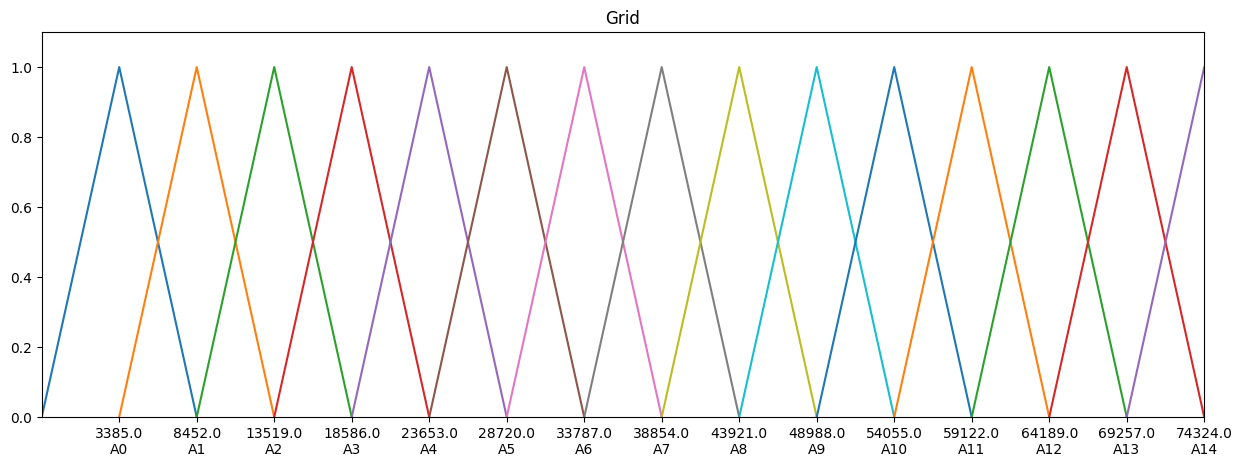

In [24]:
# 4. Xây dựng phân vùng mờ (Grid Partitioner)
partitioner = Grid.GridPartitioner(data=train_data, npart=15)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
partitioner.plot(ax)

In [25]:
# 5. Fuzzyfy dữ liệu huấn luyện (Chuyển đổi dữ liệu huấn luyện thành các giá trị mờ)
fuzzyfied = partitioner.fuzzyfy(train_data)

In [26]:
# 6. Tạo các mối quan hệ logic giữa các  mờ (FLR)
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)
print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A0 -> A2', 'A1 -> A2', 'A2 -> A1', 'A2 -> A2', 'A2 -> A0', 'A1 -> A3', 'A2 -> A3', 'A3 -> A1', 'A3 -> A2', 'A3 -> A3', 'A2 -> A4', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A2', 'A3 -> A5', 'A4 -> A5', 'A5 -> A3', 'A5 -> A4', 'A5 -> A5', 'A4 -> A6', 'A5 -> A6', 'A6 -> A5', 'A6 -> A6', 'A5 -> A7', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A6 -> A8', 'A7 -> A8', 'A8 -> A7', 'A8 -> A8', 'A8 -> A6', 'A7 -> A5', 'A7 -> A9', 'A8 -> A9', 'A9 -> A8', 'A9 -> A9', 'A8 -> A10', 'A9 -> A10', 'A10 -> A9', 'A10 -> A10', 'A9 -> A11', 'A10 -> A11', 'A11 -> A10', 'A11 -> A11', 'A10 -> A8', 'A11 -> A8', 'A11 -> A9', 'A10 -> A12', 'A11 -> A12', 'A12 -> A11', 'A12 -> A12', 'A12 -> A10', 'A9 -> A7', 'A11 -> A13', 'A12 -> A13', 'A13 -> A12', 'A13 -> A13', 'A13 -> A11']


In [27]:
# 7. Xây dựng mô hình FTS
model = chen.ConventionalFTS(partitioner=partitioner)
model.fit(train_data)
print(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A4,A5
A5 -> A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A9
A11 -> A10,A11,A12,A9
A12 -> A11,A12,A13
A13 -> A12,A13



In [28]:
# 8. Dự đoán dữ liệu test
train_predict = model.predict(train_data)
y_pred_test = model.predict(test_data)

In [29]:
# 9. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, test_data)
test_mape = mean_absolute_percentage_error(y_pred_test, test_data)
test_rmse = np.sqrt(mean_squared_error(y_pred_test, test_data))
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 2077.744364602857
Testing RMSE: 2470.3972734780846
Testing MAPE: 0.07131298104750748


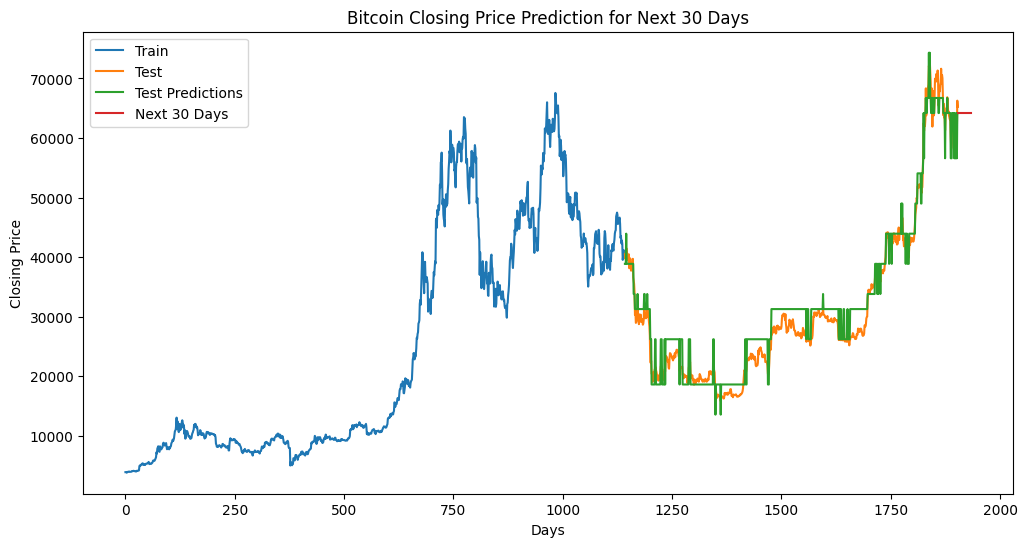

Predicted closing prices for the next 30 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963]


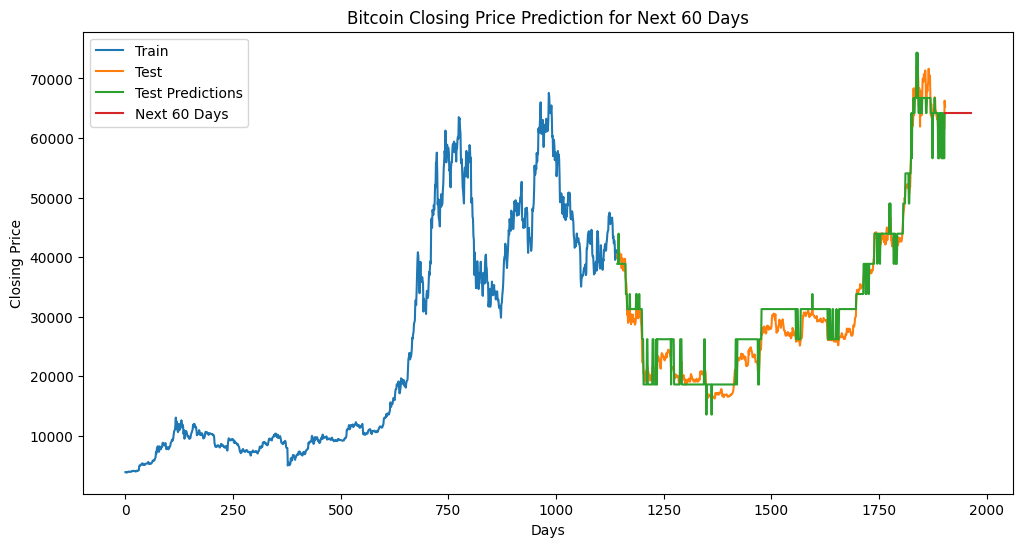

Predicted closing prices for the next 60 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963]


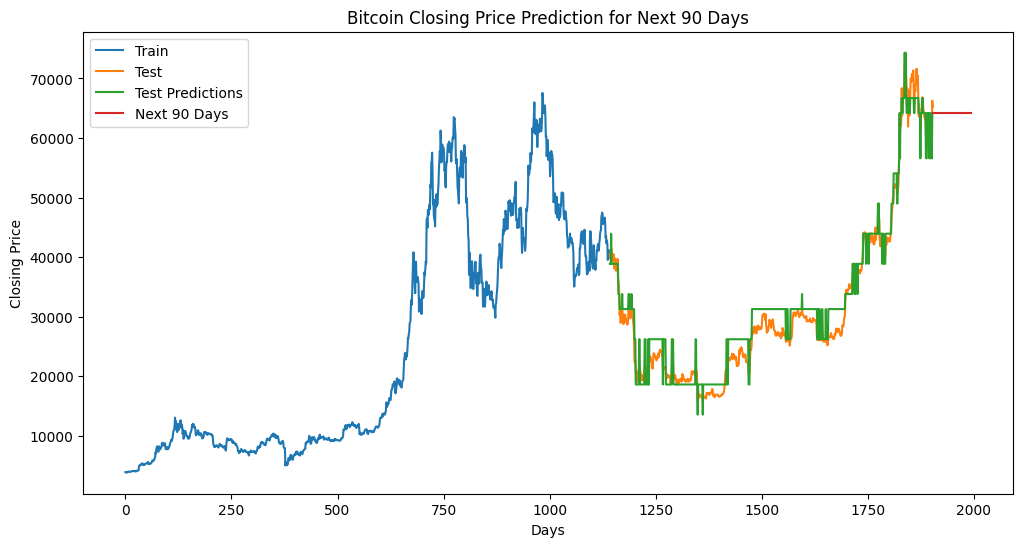

Predicted closing prices for the next 90 days:
[64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 64189.4952963 64189.4952963 64189.4952963
 64189.4952963 64189.4952963 6

In [30]:
# 10. Dự đoán 30, 60, 90 ngày tiếp theo
time_step = 100
def predict_future(model, data, days):
    temp_input = list(data)
    lst_output = []

    for _ in range(days):
        x_input = temp_input[-1]  # Lấy giá trị cuối cùng để dự đoán tiếp
        yhat = model.predict([x_input])[0]  # Dự đoán giá trị tiếp theo
        temp_input.append(yhat)
        lst_output.append(yhat)

    return np.array(lst_output)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, days)


    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), train_data, label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(range(len(train_data), len(train_data) + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())